In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
assoc_stats_decoding = pd.read_csv('../../data/task/stats/decoding_association_statistics.csv')
assoc_stats_decoding.head()

,Variable,Region,Decoding accuracy,Coefficient,Coefficient normalized by accuracy,t-value,p-value (raw),p-value (FDR),Significant
0,Duration of longest sleep bout,10d,0.790765,0.000977,0.004670,1.837198,0.066204,0.108333,False
1,Duration of longest sleep bout,10pp,0.763467,0.000500,0.002114,0.896611,0.369943,0.408526,False
2,Duration of longest sleep bout,10r,0.776091,0.000403,0.001801,0.732161,0.464084,0.494290,False
3,Duration of longest sleep bout,10v,0.784642,0.001060,0.004922,1.980074,0.047716,0.084195,False
4,Duration of longest sleep bout,11l,0.772188,0.001473,0.006466,2.651527,0.008023,0.029752,False


In [3]:
assoc_stats_decoding = assoc_stats_decoding.pivot(index='Region', columns='Variable', values='Coefficient')

<AxesSubplot:xlabel='Variable', ylabel='Variable'>

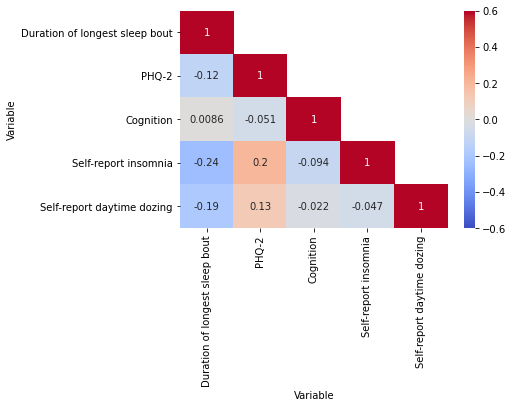

In [4]:
assoc_stats_decoding_corr = assoc_stats_decoding[['Duration of longest sleep bout', 'PHQ-2', 'Cognition', 
       'Self-report insomnia', 'Self-report daytime dozing']].corr()
assoc_stats_decoding_corr.values[np.triu_indices(5,1)] = np.nan
sns.heatmap(assoc_stats_decoding_corr, 
            annot=True, cmap='coolwarm', center=0.0, vmin=-.6, vmax=.6)

In [5]:
assoc_stats_fc = pd.read_csv('../../data/resting/stats/functional_connectivity_association_statistics.csv')
assoc_stats_fc['Connectivity Nodes'] = assoc_stats_fc[['Node 1', 'Node 2']].astype(str).agg('_'.join, axis=1)
assoc_stats_fc.head()

,Variable,Node 1,Node 2,Coefficient,t-value,p-value (raw),p-value (Bonferroni),Significant,Connectivity Nodes
0,Duration of longest sleep bout,0,1,-0.006724,-0.510669,0.609592,64.007151,False,0_1
1,Duration of longest sleep bout,0,2,0.002969,0.238460,0.811529,85.210495,False,0_2
2,Duration of longest sleep bout,0,3,0.006316,0.504241,0.614101,64.480558,False,0_3
3,Duration of longest sleep bout,0,4,-0.007948,-0.610794,0.541347,56.841420,False,0_4
4,Duration of longest sleep bout,0,5,0.038391,1.999093,0.045620,4.790067,False,0_5


In [6]:
assoc_stats_fc = assoc_stats_fc.pivot(index='Connectivity Nodes', columns='Variable', values='Coefficient')

<AxesSubplot:xlabel='Variable', ylabel='Variable'>

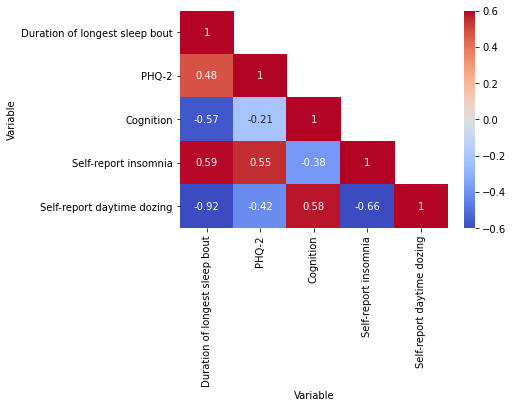

In [7]:
assoc_stats_fc_corr = assoc_stats_fc[['Duration of longest sleep bout', 'PHQ-2', 'Cognition', 
       'Self-report insomnia', 'Self-report daytime dozing']].corr()
assoc_stats_fc_corr.values[np.triu_indices(5,1)] = np.nan
sns.heatmap(assoc_stats_fc_corr, 
            annot=True, cmap='coolwarm', center=0.0, vmin=-.6, vmax=.6)